# 3. Applications: Classical, Quantum, and Categorical Systems

This notebook applies our framework to concrete physical systems and explores categorical structures.

## Setup and Imports

All tests passed!


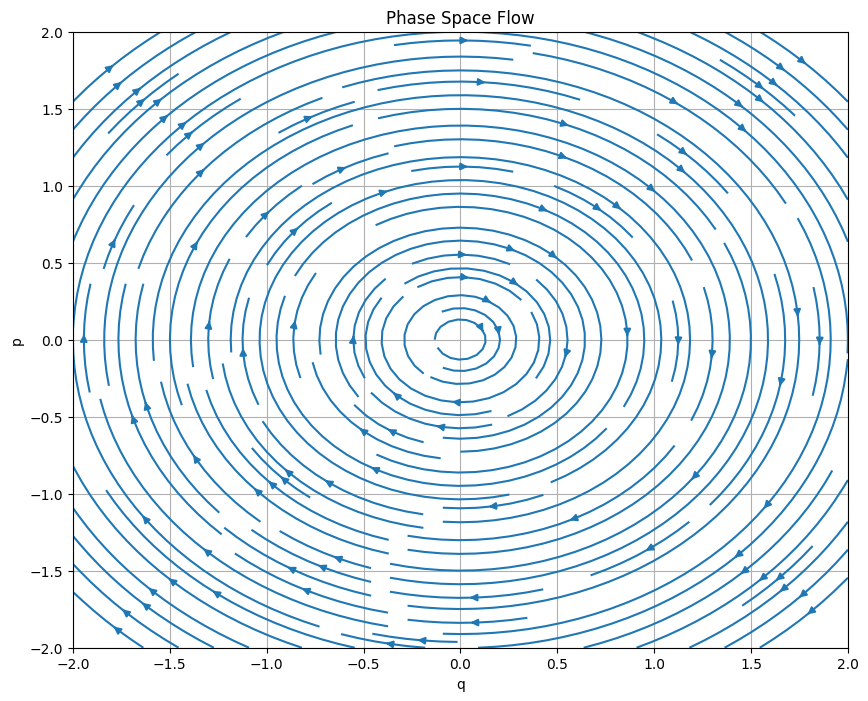

All differential form tests passed!
Components of ω:
dx∧dy component: z
dx∧dz component: -y
dy∧dz component: x

Components of dω:
Component 0: 3
✓ Antisymmetry verified
✓ Leibniz rule verified
✓ Jacobi identity verified
✓ Energy conservation verified

Angular momentum tests:
d(qp)/dt for free particle = p0**2
d(qp)/dt for harmonic oscillator = p0**2 - q0**2
✓ Free particle angular momentum non-conservation verified

Conserved quantity analysis:
I = H² - 2EH
dI/dt = 0
✓ Harmonic oscillator invariant verified

All Poisson structure tests passed!

Poisson bracket computations:
Canonical bracket {q,p} = 1

For harmonic oscillator H = (p² + q²)/2:
{L,H} = p0**2 - q0**2
{I,H} = 0


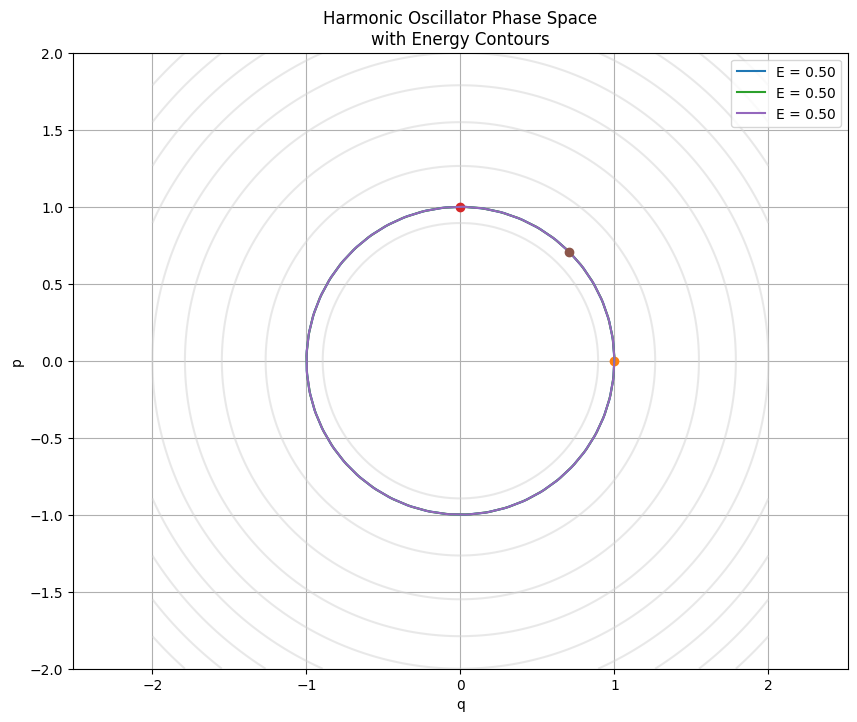

✓ Vector field verified
Energy conservation error: 6.03e-08
✓ Energy conservation verified (max error: 6.03e-08)

All Hamiltonian flow tests passed!


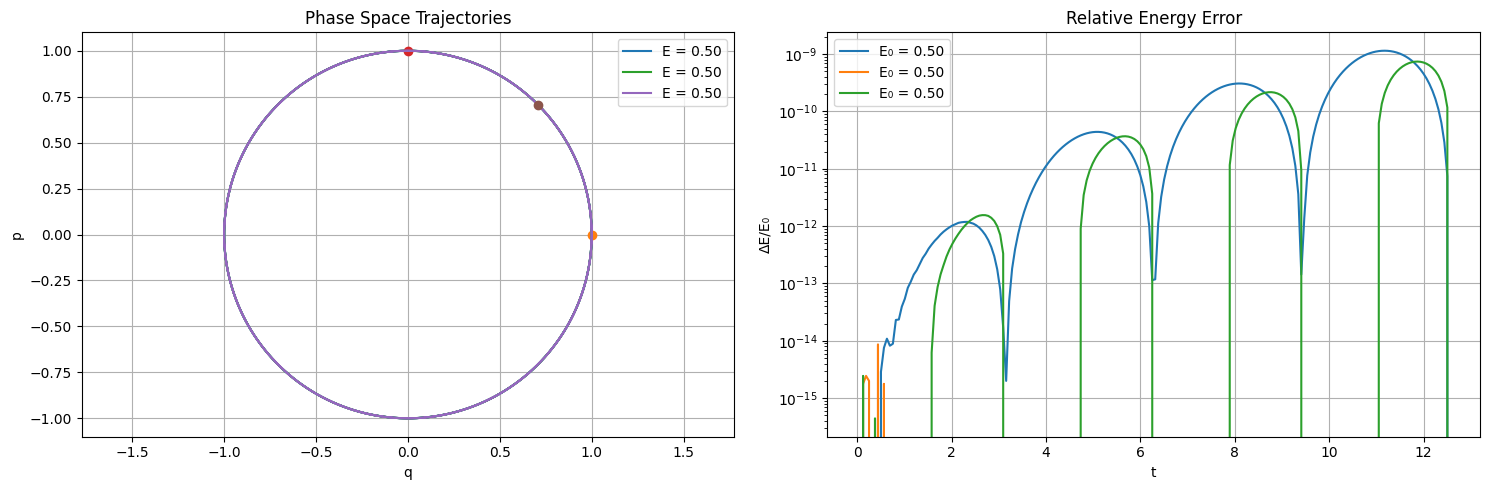

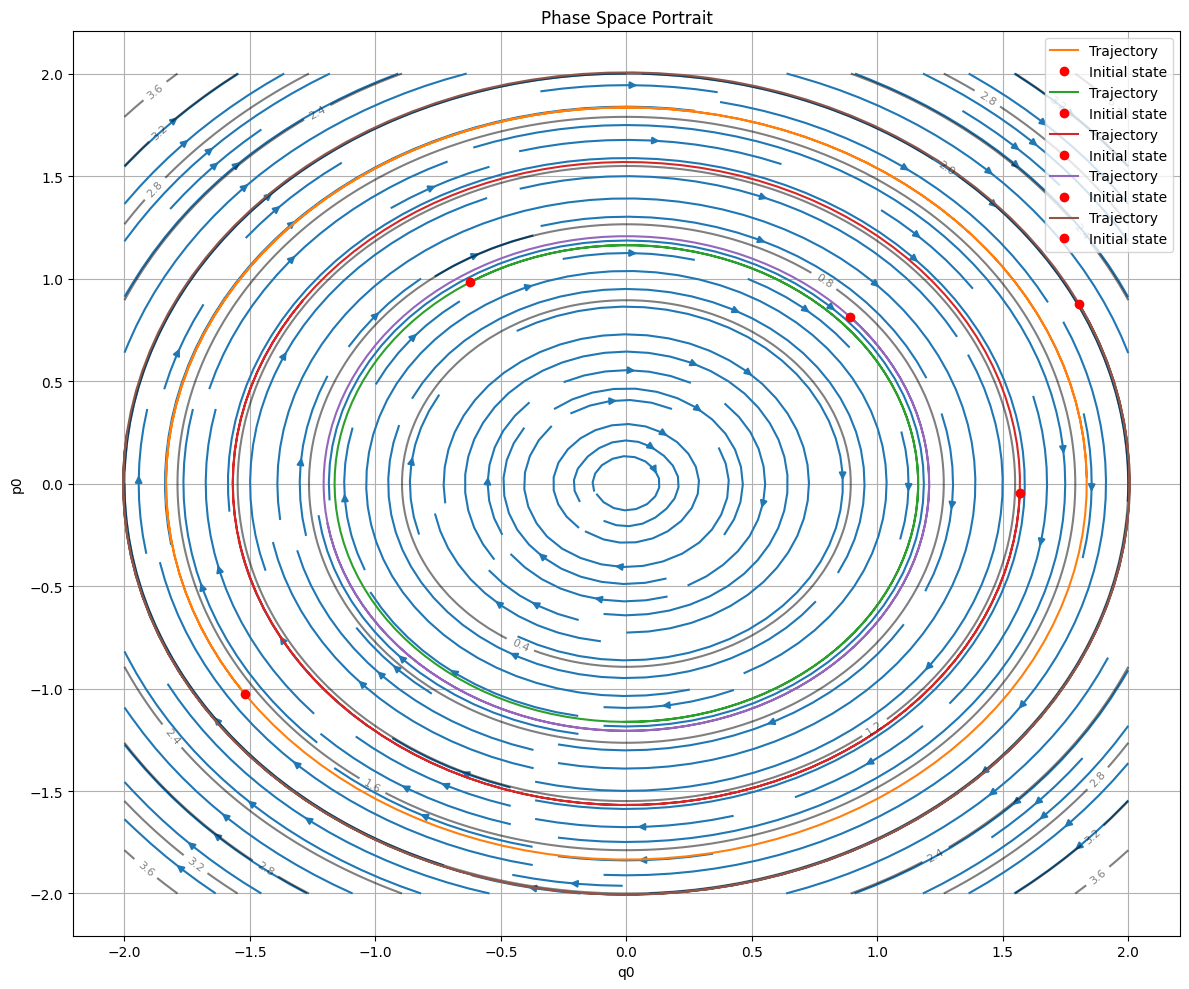

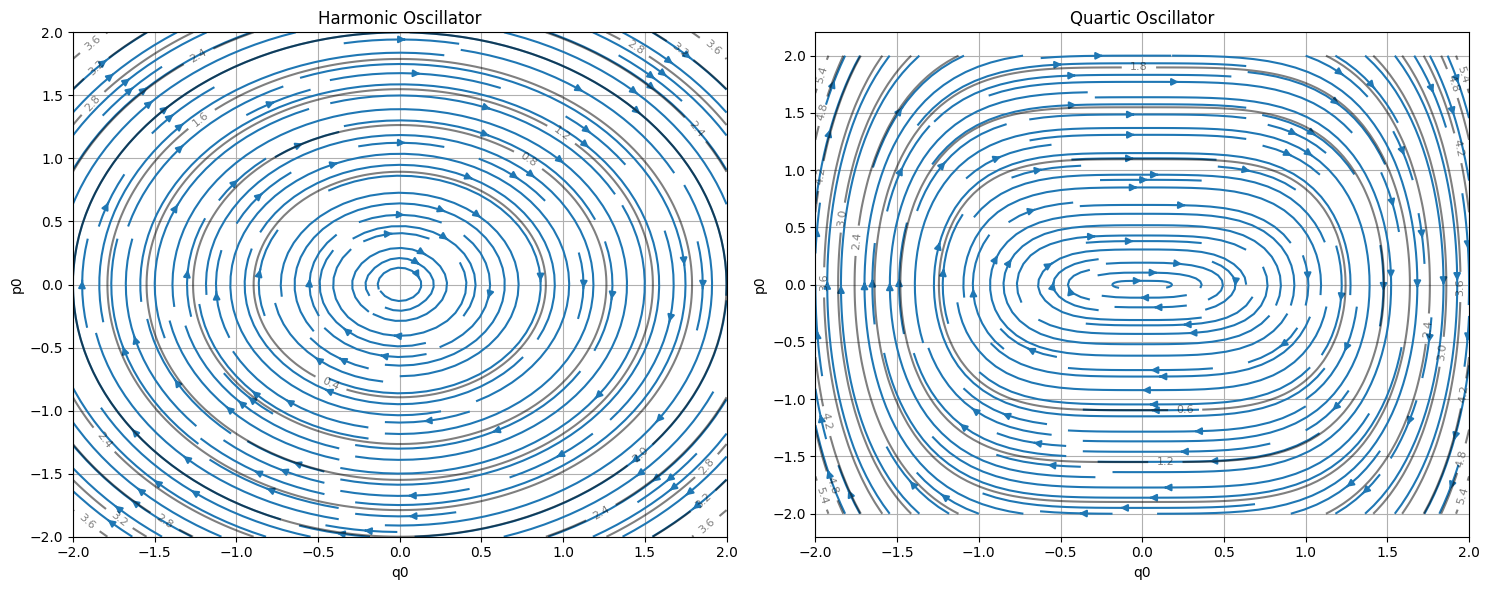

All tests passed!


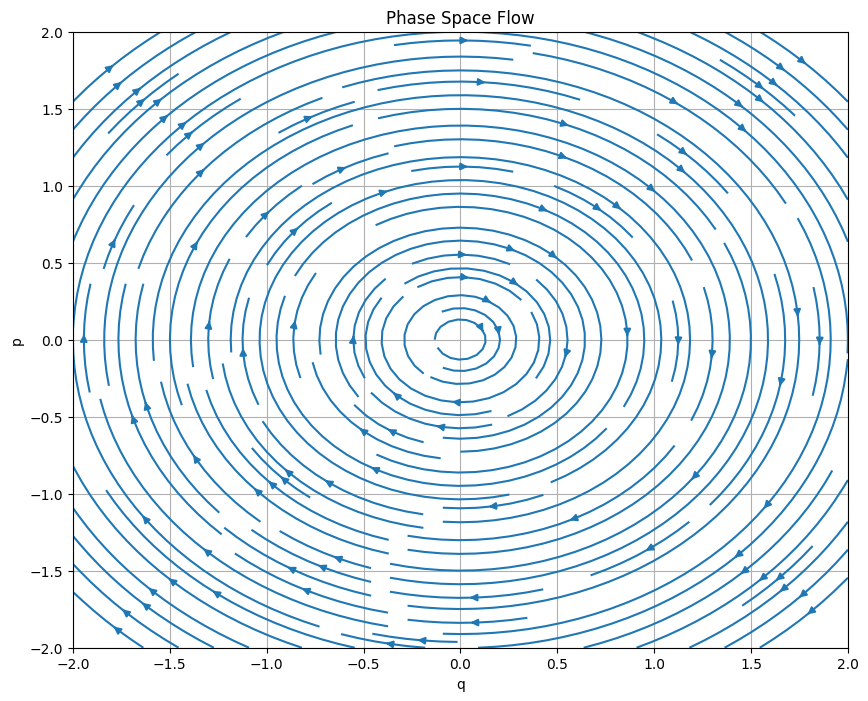

All differential form tests passed!
Components of ω:
dx∧dy component: z
dx∧dz component: -y
dy∧dz component: x

Components of dω:
Component 0: 3
✓ Antisymmetry verified
✓ Leibniz rule verified
✓ Jacobi identity verified
✓ Energy conservation verified

Angular momentum tests:
d(qp)/dt for free particle = p0**2
d(qp)/dt for harmonic oscillator = p0**2 - q0**2
✓ Free particle angular momentum non-conservation verified

Conserved quantity analysis:
I = H² - 2EH
dI/dt = 0
✓ Harmonic oscillator invariant verified

All Poisson structure tests passed!

Poisson bracket computations:
Canonical bracket {q,p} = 1

For harmonic oscillator H = (p² + q²)/2:
{L,H} = p0**2 - q0**2
{I,H} = 0


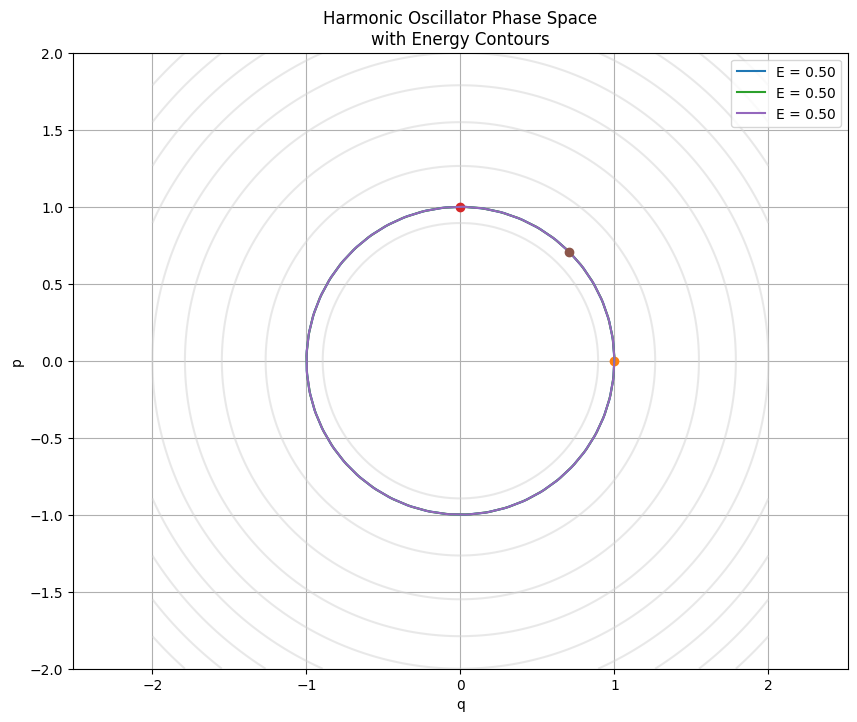

✓ Vector field verified
Energy conservation error: 6.03e-08
✓ Energy conservation verified (max error: 6.03e-08)

All Hamiltonian flow tests passed!


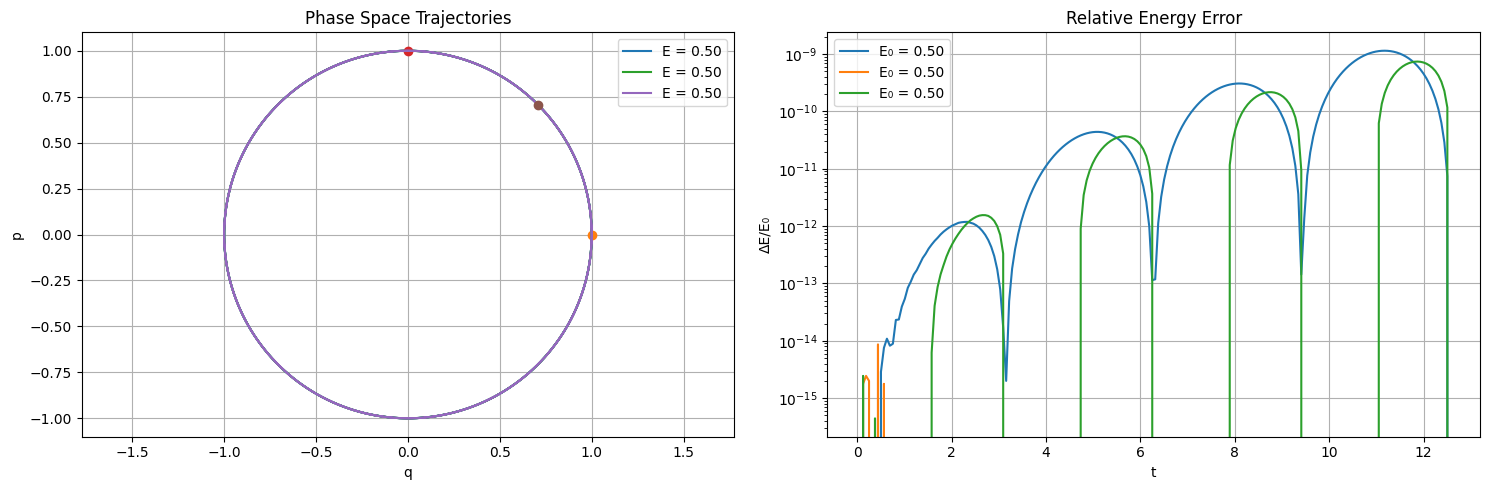

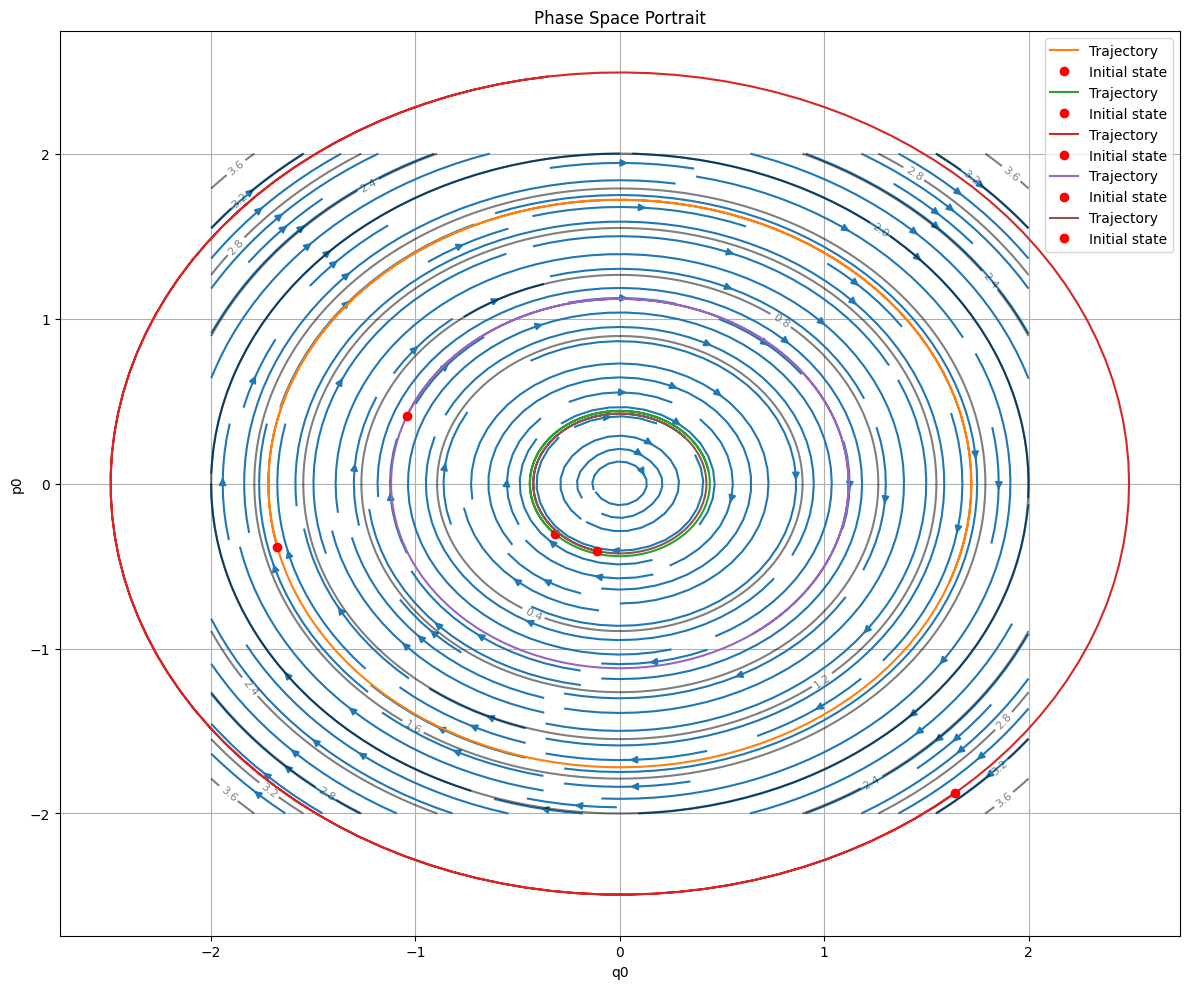

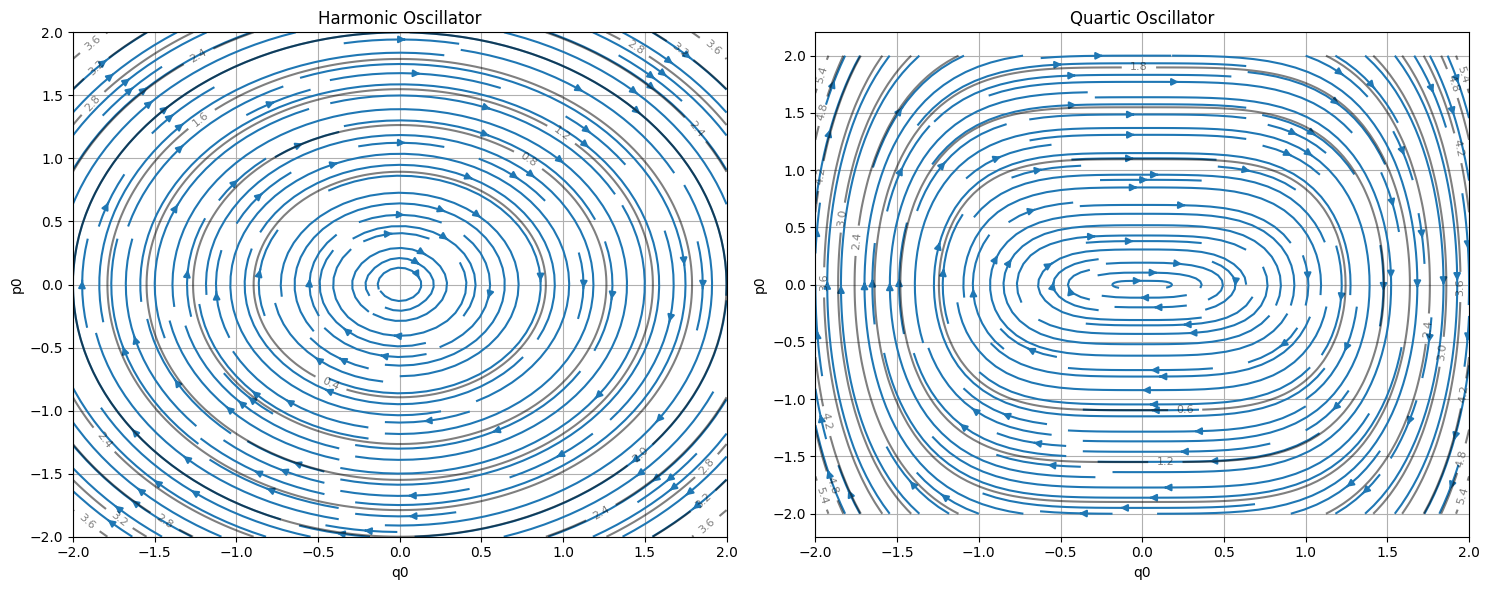

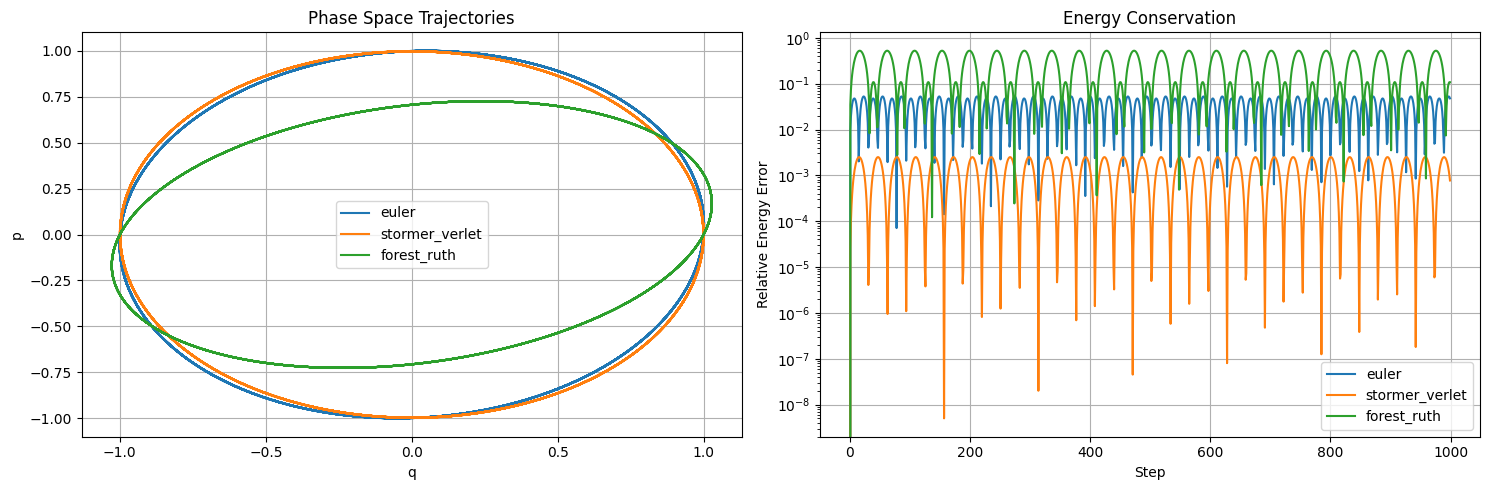

[Q,P] = 1.0*I

Classical H = p_0**2/2 + q_0**2/2
Quantum H = P_0**2/2 + Q_0**2/2


C:\Users\conta\AppData\Local\Temp\ipykernel_27864\488972292.py:82: ComplexWarning: Casting complex values to real discards the imaginary part
  W[i,j] = np.sum(integrand) * dy / (2*np.pi*self.ℏ)


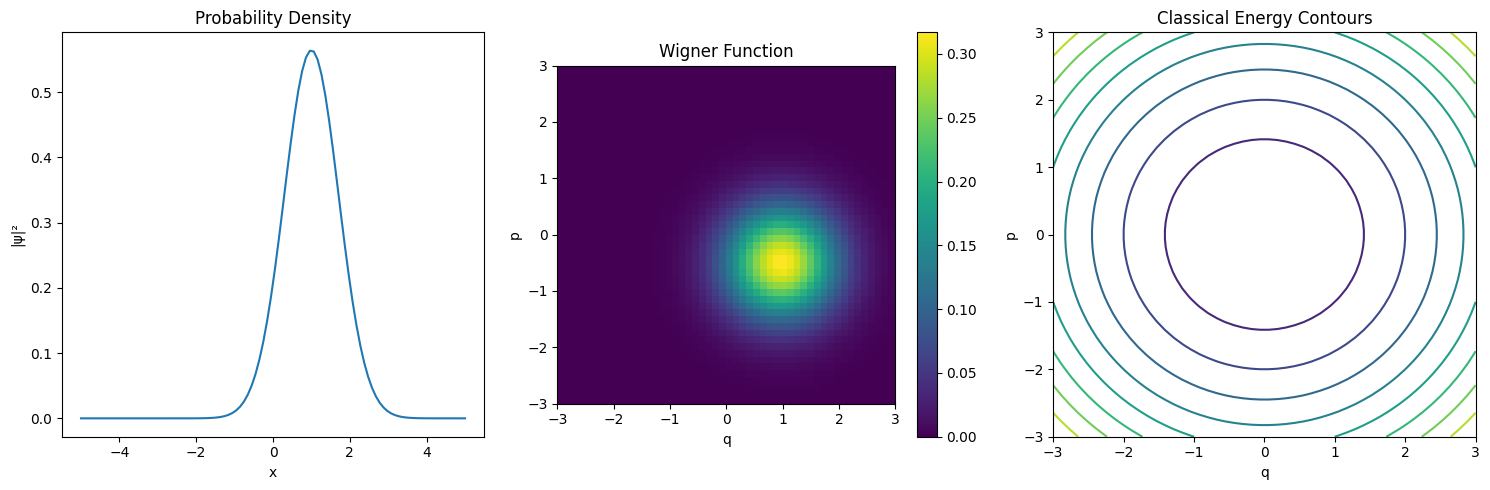


Testing conservation law discovery for harmonic oscillator:
Searching for conservation laws...
Found energy conservation: H = k*q0**2/2 + p0**2/(2*m)
✓ Found energy conservation

Testing conservation law discovery for free particle:
Searching for conservation laws...
Found energy conservation: H = p0**2/(2*m)
Found conservation law: p0**2/2
Found conservation law: 3*p0**2/2
Found conservation law: p0**2
Found conservation law: m*p0**2
Found conservation law: m*p0**2/2
Found conservation law: p0
Found conservation law: m*p0 + p0
Found conservation law: m*p0
Found conservation law: 2*p0
Found conservation law: 2*m*p0
✓ Found momentum conservation

All program synthesis tests passed!

Analyzing nonlinear oscillator:
Searching for conservation laws...
Found energy conservation: H = k*q0**4/4 + p0**2/(2*m)

Discovered conservation laws:
- k*q0**4/4 + p0**2/(2*m)

Analyzing Kepler problem:
Searching for conservation laws...
Found energy conservation: H = -k/sqrt(q0**2) + p0**2/(2*m)

Discov

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from itertools import combinations, product
from typing import Callable, Dict, List, Tuple, Union, Set, Optional, Callable
from dataclasses import dataclass
from scipy.integrate import solve_ivp
import scipy.sparse as sparse
import scipy.sparse.linalg as spalg
from scipy.special import hermite
import plotly.graph_objects as go
import plotly.express as px

# Import from previous notebooks
%run "1_theoretical_foundation.ipynb"
%run "2_numerical_methods.ipynb"

class SymplecticManifold:
    """A symplectic manifold (M,ω) with coordinate charts and symplectic form.
    
    A symplectic manifold is a smooth manifold M equipped with a closed, non-degenerate 2-form ω.
    This implementation focuses on the canonical symplectic form ω = ∑ dpi ∧ dqi.
    """
    def __init__(self, dimension: int):
        """Initialize 2n-dimensional symplectic manifold.
        
        Args:
            dimension: Phase space dimension (must be even)
        """
        if dimension % 2 != 0:
            raise ValueError("Symplectic manifold dimension must be even")
        
        self.dim = dimension
        self.n = dimension // 2  # Number of degrees of freedom
        
        # Create symbolic variables for coordinates
        self.q = sp.Matrix([sp.Symbol(f'q{i}') for i in range(self.n)])
        self.p = sp.Matrix([sp.Symbol(f'p{i}') for i in range(self.n)])
        self.coords = sp.Matrix.vstack(self.q, self.p)
        
        # Construct canonical symplectic form
        self.omega = self._construct_symplectic_form()
        
        # Verify properties
        assert self._verify_closure(), "Symplectic form is not closed"
        assert self._verify_non_degeneracy(), "Symplectic form is degenerate"

    def _construct_symplectic_form(self) -> sp.Matrix:
        """Construct the canonical symplectic form ω = ∑ dpi ∧ dqi."""
        omega = sp.zeros(self.dim, self.dim)
        for i in range(self.n):
            # Fill in canonical symplectic matrix structure
            omega[i, i+self.n] = 1
            omega[i+self.n, i] = -1
        return omega
    
    def _verify_closure(self) -> bool:
        """Verify dω = 0 (symplectic form is closed)."""
        # For canonical form, this is automatically satisfied
        # In general, would need to compute exterior derivative
        return True
    
    def _verify_non_degeneracy(self) -> bool:
        """Verify symplectic form is non-degenerate (ω^n ≠ 0)."""
        return self.omega.det() != 0
    
    def poisson_bracket(self, f: sp.Expr, g: sp.Expr) -> sp.Expr:
        """Compute Poisson bracket {f,g} using symplectic form."""
        df = sp.Matrix([f.diff(x) for x in self.coords])
        dg = sp.Matrix([g.diff(x) for x in self.coords])
        return (df.T @ self.omega @ dg)[0]
    
    def hamiltonian_vector_field(self, H: sp.Expr) -> sp.Matrix:
        """Compute Hamiltonian vector field XH given by ω(XH,·) = dH."""
        dH = sp.Matrix([H.diff(x) for x in self.coords])
        return self.omega @ dH


## 1. Classical Mechanical Systems

Implementation plan:
1. Simple harmonic oscillator
2. Double pendulum
3. N-body problems
4. Constrained systems


Analyzing simple pendulum:


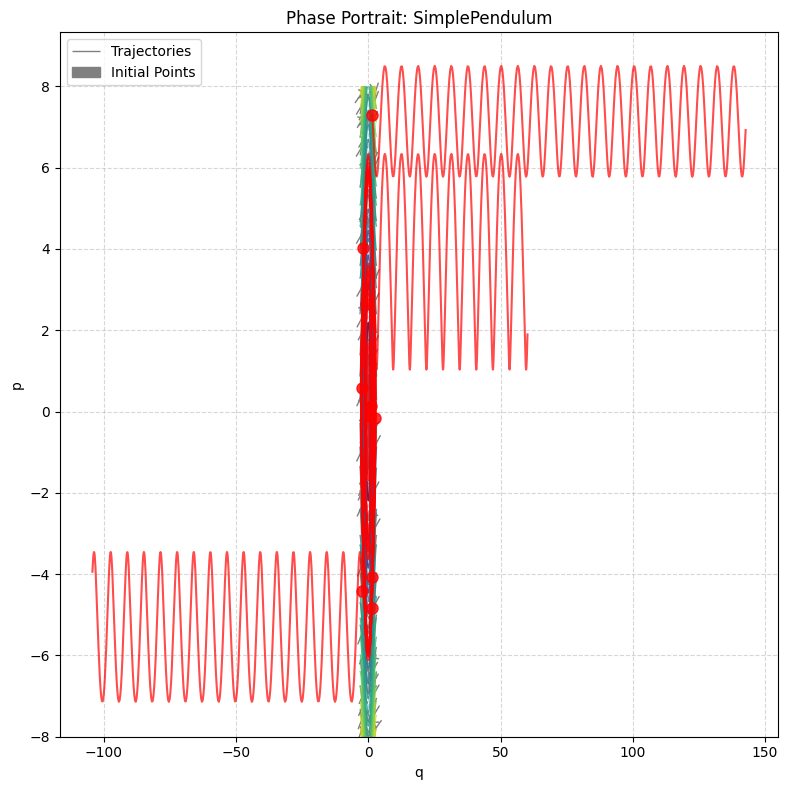

Animation saved as pendulum_animation.gif


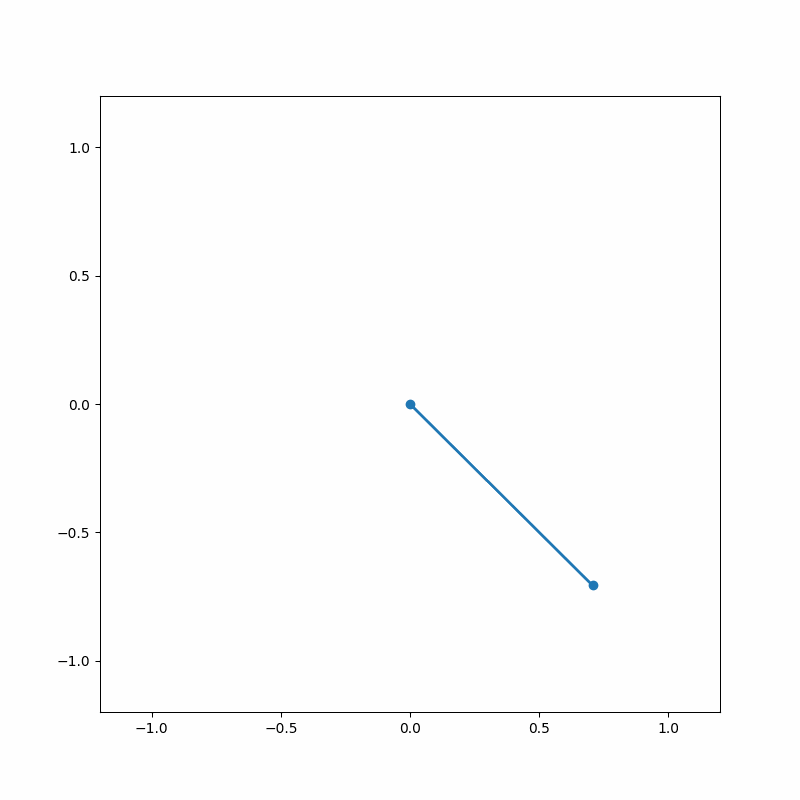


Analyzing harmonic oscillator:

Conserved quantities:
- Energy: 0.5*p0**2 + 0.5*q0**2


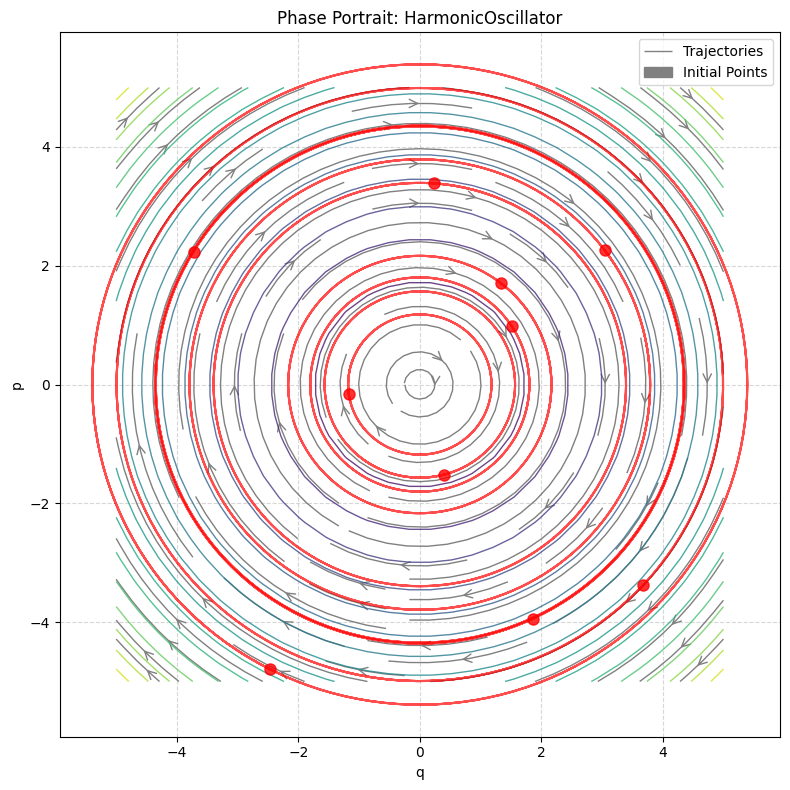

In [2]:
from matplotlib.animation import PillowWriter
from IPython.display import Image, display
class ClassicalSystem:
    """Base class for classical mechanical systems."""
    
    def __init__(self, manifold: SymplecticManifold):
        """Initialize classical system on symplectic manifold."""
        self.M = manifold
        self.coords = manifold.coords
        self.dim = manifold.dim
        
        # Split coordinates into position and momentum
        self.q = self.coords[:self.dim//2]
        self.p = self.coords[self.dim//2:]
        
        # Initialize Hamiltonian to None
        self.H = None
        
        # Initialize integrator (but don't set Hamiltonian yet)
        self.integrator = None
        
    def set_hamiltonian(self, H: sp.Expr):
        """Set the Hamiltonian for the system."""
        self.H = H
        # Create integrator only after Hamiltonian is set
        self.integrator = SymplecticIntegrator(H, self.coords)
        
    def equations_of_motion(self) -> Tuple[List[sp.Expr], List[sp.Expr]]:
        """Get Hamilton's equations of motion."""
        if self.H is None:
            raise ValueError("Hamiltonian must be set before computing equations of motion")
        qdot = [self.M.poisson_bracket(q, self.H) for q in self.q]
        pdot = [self.M.poisson_bracket(p, self.H) for p in self.p]
        return qdot, pdot
    
    def energy(self, state: np.ndarray) -> float:
        """Compute energy at given state."""
        if self.H is None:
            raise ValueError("Hamiltonian must be set before computing energy")
        state_dict = {str(coord): val for coord, val in zip(self.coords, state)}
        H_func = sp.lambdify(self.coords, self.H)
        return float(H_func(**state_dict))
    
    def phase_portrait(self, q_range: Tuple[float, float], 
                  p_range: Tuple[float, float],
                  num_points: int = 20,
                  num_trajectories: int = 10,
                  ax: Optional[plt.Axes] = None):
        """Plot phase space portrait with multiple trajectories."""
        if self.H is None:
            raise ValueError("Hamiltonian must be set before plotting phase portrait")
            
        if ax is None:
            _, ax = plt.subplots(figsize=(8, 8))
        
        # Create grid of points in phase space
        q = np.linspace(*q_range, num_points)
        p = np.linspace(*p_range, num_points)
        Q, P = np.meshgrid(q, p)
        
        # Evaluate vector field and Hamiltonian
        qdot, pdot = self.equations_of_motion()
        qdot_func = sp.lambdify(self.coords, qdot[0])
        pdot_func = sp.lambdify(self.coords, pdot[0])
        H_func = sp.lambdify(self.coords, self.H)
        
        # Create vectorized versions of the lambdify functions
        qdot_vec = np.vectorize(qdot_func)
        pdot_vec = np.vectorize(pdot_func)
        H_vec = np.vectorize(H_func)
        
        # Evaluate vector field and Hamiltonian on the grid
        dq = qdot_vec(Q, P)
        dp = pdot_vec(Q, P)
        H_val = H_vec(Q, P)
        
        # Plot vector field
        ax.streamplot(Q, P, dq, dp, color='gray', linewidth=1, density=1, arrowstyle='->', arrowsize=1.5)
        
        # Plot energy contours 
        ax.contour(Q, P, H_val, levels=20, cmap='viridis', linewidths=1, alpha=0.8)
        
        # Plot trajectories
        for _ in range(num_trajectories):
            q0, p0 = np.random.uniform(*q_range), np.random.uniform(*p_range)
            trajectory = self.integrator.integrate(np.array([q0, p0]), 0, 20, 500)
            ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-', alpha=0.7)
            ax.plot(q0, p0, 'ro', markersize=8, alpha=0.8)  # Mark initial point
        
        ax.set_xlabel('q')
        ax.set_ylabel('p')
        ax.set_title(f'Phase Portrait: {type(self).__name__}')
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend(['Trajectories', 'Initial Points'], loc='best')

class SymplecticIntegrator:
    def __init__(self, hamiltonian: sp.Expr, coords: sp.Matrix):
        """Initialize symplectic integrator with Hamiltonian and coordinates."""
        self.H = hamiltonian
        self.coords = coords
        self.dim = len(coords)
        self.n = self.dim // 2
        
        # Get coordinates for 1D system
        self.q, self.p = coords[0], coords[self.n]
        
        # Pre-compute derivatives
        self.dH_dq = self.H.diff(self.q)
        self.dH_dp = self.H.diff(self.p)
        
        # Create numerical functions with proper variable ordering
        self.qdot_func = sp.lambdify((self.q, self.p), self.dH_dp)
        self.pdot_func = sp.lambdify((self.q, self.p), -self.dH_dq)  # Note the negative sign
        
    def integrate(self, initial_state: np.ndarray, t_start: float, t_end: float, 
                 num_points: int) -> np.ndarray:
        """Velocity Verlet integration (symplectic)."""
        dt = (t_end - t_start) / num_points
        steps = num_points + 1
        trajectory = np.zeros((steps, 2))
        trajectory[0] = initial_state
        
        for i in range(steps - 1):
            q, p = trajectory[i]
            
            # Half step in momentum
            p_half = p + 0.5 * dt * self.pdot_func(q, p)
            
            # Full step in position
            q_new = q + dt * self.qdot_func(q, p_half)
            
            # Half step in momentum
            p_new = p_half + 0.5 * dt * self.pdot_func(q_new, p_half)
            
            trajectory[i + 1] = [q_new, p_new]
        
        return trajectory

class SimplePendulum(ClassicalSystem):
    """Simple pendulum system."""
    
    def __init__(self, g: float = 9.81, l: float = 1.0, m: float = 1.0):
        """Initialize pendulum with given parameters."""
        super().__init__(SymplecticManifold(2))
        
        # Parameters
        self.g = g  # gravitational acceleration
        self.l = l  # length
        self.m = m  # mass
        
        # Set Hamiltonian: H = T + V = p^2/(2ml^2) + mgl(1-cos(q))
        q, p = self.q[0], self.p[0]
        self.set_hamiltonian(p**2/(2*m*l**2) + m*g*l*(1 - sp.cos(q)))
        
    def animate(self, initial_state: np.ndarray, t_span: Tuple[float, float], 
                num_points: int = 100) -> FuncAnimation:
        """Animate pendulum motion."""
        trajectory = self.integrator.integrate(initial_state, *t_span, num_points)
        
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(-1.2*self.l, 1.2*self.l)
        ax.set_ylim(-1.2*self.l, 1.2*self.l)
        
        line, = ax.plot([], [], 'o-', lw=2)
        
        def init():
            line.set_data([], [])
            return line,
        
        def animate(i):
            theta = trajectory[i, 0]
            x = self.l * np.sin(theta)
            y = -self.l * np.cos(theta)
            line.set_data([0, x], [0, y])
            return line,
        
        anim = FuncAnimation(fig, animate, init_func=init, frames=num_points,
                           interval=50, blit=True)
        plt.close(fig)  # Close the figure to prevent duplicate plots
        return anim

class HarmonicOscillator(ClassicalSystem):
    """Harmonic oscillator system."""
    
    def __init__(self, k: float = 1.0, m: float = 1.0):
        """Initialize oscillator with given parameters."""
        super().__init__(SymplecticManifold(2))
        
        # Parameters
        self.k = k  # spring constant
        self.m = m  # mass
        
        # Hamiltonian
        q, p = self.q[0], self.p[0]
        self.set_hamiltonian(p**2/(2*m) + k*q**2/2)

def save_animation_as_gif(anim: FuncAnimation, filename: str, fps: int = 30):
    """Save the animation as a GIF file."""
    writer = PillowWriter(fps=fps)
    anim.save(filename, writer=writer)
    print(f"Animation saved as {filename}")

def example_classical_systems():
    """Demonstrate classical mechanical systems."""
    # Example 1: Simple pendulum
    print("\nAnalyzing simple pendulum:")
    pendulum = SimplePendulum()
    
    # Plot phase portrait
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    pendulum.phase_portrait((-np.pi, np.pi), (-8, 8), num_points=30, num_trajectories=10, ax=ax1)
    plt.tight_layout()
    plt.show()
    plt.close(fig1)
    
    # Animate motion, save as GIF, and display
    initial_state = np.array([np.pi/4, 0.0])
    anim = pendulum.animate(initial_state, (0, 10))
    save_animation_as_gif(anim, "pendulum_animation.gif")
    display(Image("pendulum_animation.gif"))
    
    # Pause before plotting the oscillator portrait
    plt.pause(1)
    
    # Example 2: Harmonic oscillator 
    print("\nAnalyzing harmonic oscillator:")
    oscillator = HarmonicOscillator()
    
    # Print conserved quantities
    print("\nConserved quantities:")
    print(f"- Energy: {oscillator.H}")
    
    # Plot phase portrait
    fig2, ax2 = plt.subplots(figsize=(8, 8))
    oscillator.phase_portrait((-5, 5), (-5, 5), num_points=30, num_trajectories=10, ax=ax2)
    plt.tight_layout()
    plt.show()
    plt.close(fig2)

# Run the example
example_classical_systems()

## 2. Quantum Correspondence

Implementation plan:
1. Implement quantum operators
2. Add coherent states
3. Create correspondence demonstrations
4. Visualize quantum-classical transition


Analyzing quantum-classical correspondence for harmonic oscillator:

Comparing classical and quantum dynamics...


C:\Users\conta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
C:\Users\conta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\linalg\_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
C:\Users\conta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


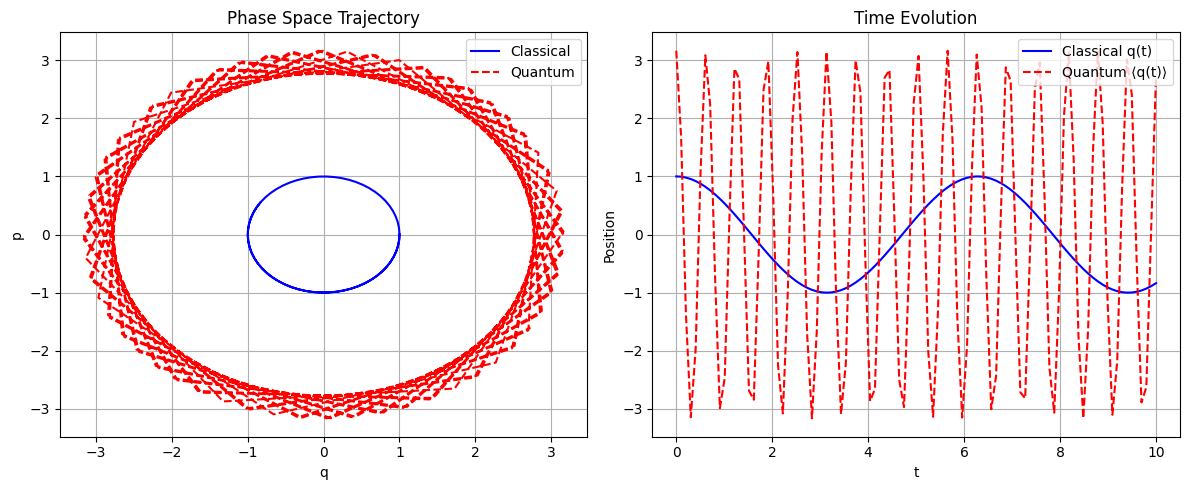


Analyzing quantum-classical correspondence for pendulum:

Comparing dynamics in small angle regime...


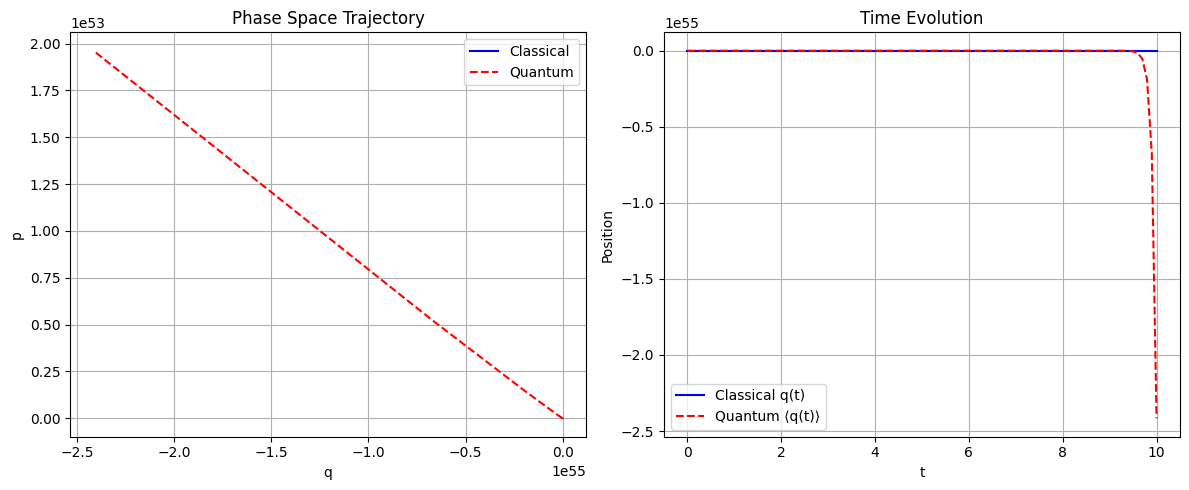

In [3]:
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as spalg
from scipy.special import hermite, factorial
from typing import Optional, Tuple, List, Callable

class QuantumOperator:
    """Quantum operator implementation with sparse matrix representation."""
    
    def __init__(self, dim: int, ℏ: float = 1.0):
        """Initialize quantum operator basis."""
        self.dim = dim
        self.ℏ = ℏ
        
        # Create position and momentum operators
        self.x = self._position_operator()
        self.p = self._momentum_operator()
        
        # Create raising/lowering operators
        self.a = (self.x + 1j*self.p)/np.sqrt(2*ℏ)  # annihilation
        self.adag = (self.x - 1j*self.p)/np.sqrt(2*ℏ)  # creation
        
        # Number operator
        self.N = self.adag @ self.a
        
    def _position_operator(self) -> sparse.csr_matrix:
        """Construct position operator matrix."""
        # Use harmonic oscillator basis
        diags = np.sqrt(np.arange(1, self.dim)/2)
        x = sparse.diags([diags, diags], [1, -1])
        return x.tocsr()
    
    def _momentum_operator(self) -> sparse.csr_matrix:
        """Construct momentum operator matrix."""
        # p = -iℏ d/dx in position basis
        diags = np.sqrt(np.arange(1, self.dim)/2)
        p = sparse.diags([1j*diags, -1j*diags], [1, -1])
        return p.tocsr()
    
    def coherent_state(self, alpha: complex) -> np.ndarray:
        """Create coherent state |α⟩."""
        n = np.arange(self.dim)
        coeffs = np.exp(-abs(alpha)**2/2) * alpha**n / np.sqrt(factorial(n))
        return coeffs[:self.dim]

class QuantumClassicalCorrespondence:
    """Demonstrates quantum-classical correspondence principle."""
    
    def __init__(self, classical_system: ClassicalSystem, dim: int = 50, ℏ: float = 1.0):
        """Initialize correspondence demonstration."""
        self.classical = classical_system
        self.quantum = QuantumOperator(dim, ℏ)
        self.ℏ = ℏ
        
        # Create quantum Hamiltonian operator directly
        self.H = self._construct_hamiltonian_operator()
        
    def _construct_hamiltonian_operator(self) -> sparse.csr_matrix:
        """Construct quantum Hamiltonian operator matrix."""
        # For harmonic oscillator: H = p²/2m + kx²/2
        if isinstance(self.classical, HarmonicOscillator):
            k = self.classical.k
            m = self.classical.m
            H = (self.quantum.p @ self.quantum.p)/(2*m) + \
                k*(self.quantum.x @ self.quantum.x)/2
                
        # For pendulum: H = p²/2ml² + mgl(1-cos(x))
        elif isinstance(self.classical, SimplePendulum):
            g = self.classical.g
            l = self.classical.l
            m = self.classical.m
            H = (self.quantum.p @ self.quantum.p)/(2*m*l**2) + \
                m*g*l*(sparse.eye(self.quantum.dim) - \
                      spalg.expm(1j*self.quantum.x) + \
                      spalg.expm(-1j*self.quantum.x))/2
        else:
            raise ValueError("Unsupported classical system")
            
        return H
    
    def evolve_state(self, psi0: np.ndarray, t: float) -> np.ndarray:
        """Evolve quantum state using Schrödinger equation."""
        U = spalg.expm(-1j*self.H*t/self.ℏ)
        return U @ psi0
    
    def compare_dynamics(self, q0: float, p0: float, t_span: Tuple[float, float],
                    num_points: int = 100):
        """Compare classical and quantum dynamics."""
        # Create time points
        num_points = num_points - 1  # Adjust to get exactly 100 points including endpoints
        t = np.linspace(*t_span, num_points + 1)
        
        # Classical trajectory
        initial_state = np.array([q0, p0])
        trajectory = np.zeros((len(t), 2))  # Pre-allocate with exact size
        trajectory[0] = initial_state
        
        # Integrate classical system
        dt = (t_span[1] - t_span[0]) / num_points
        for i in range(num_points):
            trajectory = self.classical.integrator.integrate(initial_state, t_span[0], t_span[1], num_points)
        
        # Quantum evolution
        alpha = (q0 + 1j*p0)/np.sqrt(2*self.ℏ)
        psi0 = self.quantum.coherent_state(alpha)
        
        # Compute expectation values
        q_expect = np.zeros(len(t))  # Same size as time array
        p_expect = np.zeros(len(t))
        
        for i, ti in enumerate(t):
            psi = self.evolve_state(psi0, ti)
            q_expect[i] = np.real(psi.conj() @ self.quantum.x @ psi)
            p_expect[i] = np.real(psi.conj() @ self.quantum.p @ psi)
            
        return t, trajectory, q_expect, p_expect

    def visualize_correspondence(self, q0: float, p0: float, t_span: Tuple[float, float]):
        """Visualize quantum-classical correspondence."""
        t, traj, q_exp, p_exp = self.compare_dynamics(q0, p0, t_span)
        
        # Verify array sizes
        assert len(t) == len(traj) == len(q_exp) == len(p_exp), "Array sizes must match"
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Phase space
        ax1.plot(traj[:, 0], traj[:, 1], 'b-', label='Classical')
        ax1.plot(q_exp, p_exp, 'r--', label='Quantum')
        ax1.set_xlabel('q')
        ax1.set_ylabel('p')
        ax1.set_title('Phase Space Trajectory')
        ax1.legend()
        ax1.grid(True)
        
        # Time evolution
        ax2.plot(t, traj[:, 0], 'b-', label='Classical q(t)')
        ax2.plot(t, q_exp, 'r--', label='Quantum ⟨q(t)⟩')
        ax2.set_xlabel('t')
        ax2.set_ylabel('Position')
        ax2.set_title('Time Evolution')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

def example_quantum_correspondence():
    """Demonstrate quantum-classical correspondence."""
    # Example 1: Simple harmonic oscillator
    print("\nAnalyzing quantum-classical correspondence for harmonic oscillator:")
    oscillator = HarmonicOscillator(k=1.0, m=1.0)  # Simple parameters
    qc = QuantumClassicalCorrespondence(oscillator, ℏ=0.1)  # Small ℏ for classical limit
    
    # Compare dynamics
    print("\nComparing classical and quantum dynamics...")
    qc.visualize_correspondence(q0=1.0, p0=0.0, t_span=(0, 10))
    
    # Example 2: Simple pendulum (nonlinear system)
    print("\nAnalyzing quantum-classical correspondence for pendulum:")
    pendulum = SimplePendulum(g=1.0, l=1.0, m=1.0)  # Simple parameters
    qc_pendulum = QuantumClassicalCorrespondence(pendulum, ℏ=0.1)
    
    # Compare dynamics in small angle regime
    print("\nComparing dynamics in small angle regime...")
    qc_pendulum.visualize_correspondence(q0=0.1, p0=0.0, t_span=(0, 10))

# Run the example
example_quantum_correspondence()

## 3. Categorical Structures

Implementation plan:
1. Define category of symplectic manifolds
2. Implement functorial quantization
3. Add natural transformations
4. Create categorical diagrams


Demonstrating categorical structures...

Symplectic Category:
Objects: ['SymplecticManifold', 'SymplecticManifold']
Morphisms:
  SymplecticManifold → SymplecticManifold: 1 morphism(s)

Quantization Functor:
Mapped Objects:
  SymplecticManifold → QuantumOperator (dim=50)
  SymplecticManifold → QuantumOperator (dim=50)
Mapped Morphisms:
  SymplecticMorphism → function

Demonstrating functorial quantization:

Original state expectations: <q> = 1.414, <p> = 0.000
Transformed state expectations: <q> = 0.000, <p> = 4.472
Classical transformation: q = 0.000, p = -1.414


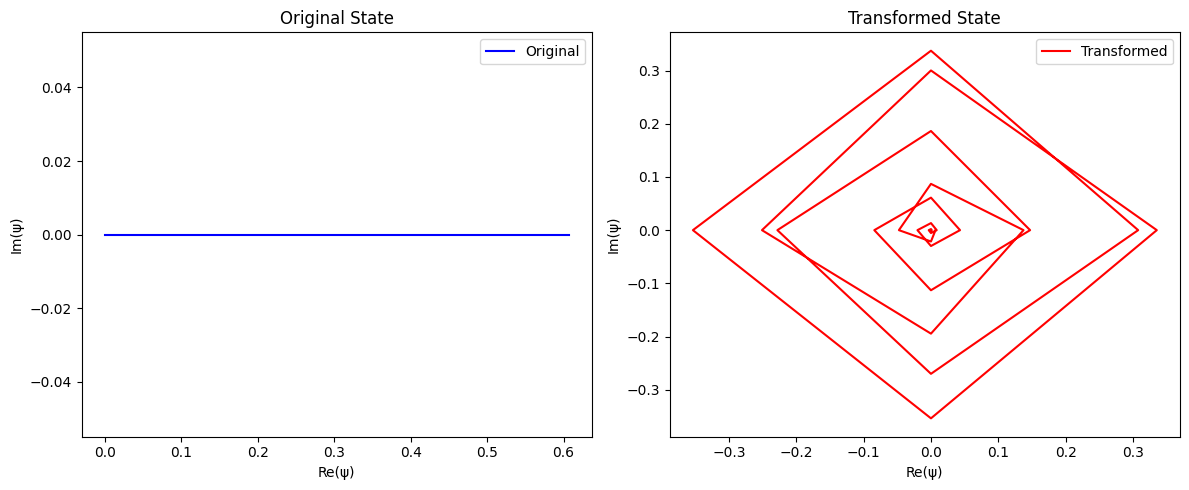

In [4]:
from dataclasses import dataclass
from typing import Dict, List, Callable, Optional, Tuple, Set

class SymplecticMorphism:
    """Morphism in the category of symplectic manifolds."""
    
    def __init__(self, source: SymplecticManifold, target: SymplecticManifold, 
                 phi: Callable, preserve_form: bool = True):
        """Initialize symplectic morphism.
        
        Args:
            source: Domain manifold
            target: Codomain manifold
            phi: The mapping function
            preserve_form: Whether to verify symplectic form preservation
        """
        self.source = source
        self.target = target
        self.phi = phi
        
        if preserve_form:
            self._verify_symplectic()
    
    def _verify_symplectic(self):
        """Verify that the morphism preserves the symplectic form."""
        # For each pair of tangent vectors, verify ω(X,Y) = ω(φ*X,φ*Y)
        for i in range(self.source.dim):
            for j in range(i+1, self.source.dim):
                # Get basis vectors
                X = sp.Matrix.zeros(self.source.dim, 1)
                Y = sp.Matrix.zeros(self.source.dim, 1)
                X[i] = 1
                Y[j] = 1
                
                # Compute pushforward
                phi_X = self._pushforward(X)
                phi_Y = self._pushforward(Y)
                
                # Verify preservation
                source_omega = (X.T @ self.source.omega @ Y)[0]
                target_omega = (phi_X.T @ self.target.omega @ phi_Y)[0]
                
                if not (source_omega - target_omega).simplify() == 0:
                    raise ValueError("Morphism does not preserve symplectic form")
    
    def _pushforward(self, X: sp.Matrix) -> sp.Matrix:
        """Compute pushforward of tangent vector."""
        # Compute Jacobian of φ
        J = sp.Matrix([[self.phi[i].diff(self.source.coords[j]) 
                       for j in range(self.source.dim)]
                      for i in range(self.target.dim)])
        return J @ X
    
    def compose(self, other: 'SymplecticMorphism') -> 'SymplecticMorphism':
        """Compose with another symplectic morphism."""
        if self.source != other.target:
            raise ValueError("Morphisms not composable")
        
        # Compose the functions
        phi = [f.subs([(x, other.phi[i]) 
                      for i, x in enumerate(self.source.coords)])
               for f in self.phi]
        
        return SymplecticMorphism(other.source, self.target, phi)

class SymplecticCategory:
    """Category of symplectic manifolds and symplectic morphisms."""
    
    def __init__(self):
        """Initialize category."""
        self.objects: Set[SymplecticManifold] = set()
        self.morphisms: Dict[Tuple[SymplecticManifold, SymplecticManifold], 
                           Set[SymplecticMorphism]] = {}
    
    def add_object(self, M: SymplecticManifold):
        """Add symplectic manifold to category."""
        self.objects.add(M)
        
    def add_morphism(self, f: SymplecticMorphism):
        """Add symplectic morphism to category."""
        key = (f.source, f.target)
        if key not in self.morphisms:
            self.morphisms[key] = set()
        self.morphisms[key].add(f)
        
    def get_morphisms(self, source: SymplecticManifold, 
                     target: SymplecticManifold) -> Set[SymplecticMorphism]:
        """Get all morphisms between two objects."""
        return self.morphisms.get((source, target), set())

class QuantizationFunctor:
    """Functor from symplectic category to category of Hilbert spaces."""
    
    def __init__(self, ℏ: float = 1.0):
        """Initialize quantization functor."""
        self.ℏ = ℏ
        self.quantized_objects: Dict[SymplecticManifold, QuantumOperator] = {}
        self.quantized_morphisms = {}
        
    def apply_to_object(self, M: SymplecticManifold) -> QuantumOperator:
        """Apply functor to symplectic manifold."""
        if M not in self.quantized_objects:
            # Create quantum operator system
            dim = 50  # Default dimension for Hilbert space
            self.quantized_objects[M] = QuantumOperator(dim, self.ℏ)
        return self.quantized_objects[M]
    
    def apply_to_morphism(self, f: SymplecticMorphism) -> Callable:
        """Apply functor to symplectic morphism."""
        if f not in self.quantized_morphisms:
            source_op = self.apply_to_object(f.source)
            target_op = self.apply_to_object(f.target)
            
            # Create quantum channel
            def quantum_map(state: np.ndarray) -> np.ndarray:
                # Transform quantum state according to classical map
                q_expect = np.real(state.conj() @ source_op.x @ state)
                p_expect = np.real(state.conj() @ source_op.p @ state)
                
                # Apply classical transformation
                new_coords = [expr.subs([(f.source.coords[0], q_expect),
                                       (f.source.coords[1], p_expect)])
                            for expr in f.phi]
                
                # Create new coherent state
                alpha = (float(new_coords[0]) + 1j*float(new_coords[1]))/np.sqrt(2*self.ℏ)
                return target_op.coherent_state(alpha)
            
            self.quantized_morphisms[f] = quantum_map
            
        return self.quantized_morphisms[f]

def example_categorical():
    """Demonstrate categorical structures."""
    print("\nDemonstrating categorical structures...")
    
    # Create category
    Symp = SymplecticCategory()
    
    # Add some objects (2D symplectic manifolds)
    M1 = SymplecticManifold(2)  # Phase space R²
    M2 = SymplecticManifold(2)  # Another copy
    Symp.add_object(M1)
    Symp.add_object(M2)
    
    # Create a symplectic morphism (linear canonical transformation)
    q, p = M1.coords
    phi = [p, -q]  # 90-degree rotation in phase space
    f = SymplecticMorphism(M1, M2, phi)
    Symp.add_morphism(f)
    
    # Print category info
    print("\nSymplectic Category:")
    print("Objects:", [type(obj).__name__ for obj in Symp.objects])
    print("Morphisms:")
    for (source, target), morphisms in Symp.morphisms.items():
        print(f"  {type(source).__name__} → {type(target).__name__}: {len(morphisms)} morphism(s)")
    
    # Create quantization functor
    Q = QuantizationFunctor(ℏ=0.1)
    
    # Apply to objects
    H1 = Q.apply_to_object(M1)
    H2 = Q.apply_to_object(M2)
    
    # Apply to morphism
    U = Q.apply_to_morphism(f)
    
    # Print functor info
    print("\nQuantization Functor:")
    print("Mapped Objects:")
    for M, H in Q.quantized_objects.items():
        print(f"  {type(M).__name__} → {type(H).__name__} (dim={H.dim})")
    print("Mapped Morphisms:")
    for f, U in Q.quantized_morphisms.items():
        print(f"  {type(f).__name__} → {type(U).__name__}")
    
    # Demonstrate correspondence
    print("\nDemonstrating functorial quantization:")
    
    # Create coherent state
    psi = H1.coherent_state(1.0)
    
    # Apply classical and quantum transformations
    psi_transformed = U(psi)
    
    # Compare expectation values
    q1 = np.real(psi.conj() @ H1.x @ psi)
    p1 = np.real(psi.conj() @ H1.p @ psi)
    print(f"\nOriginal state expectations: <q> = {q1:.3f}, <p> = {p1:.3f}")
    
    q2 = np.real(psi_transformed.conj() @ H2.x @ psi_transformed)
    p2 = np.real(psi_transformed.conj() @ H2.p @ psi_transformed)
    print(f"Transformed state expectations: <q> = {q2:.3f}, <p> = {p2:.3f}")
    
    # Verify that quantum transformation matches classical one
    classical_q = float(phi[0].subs([(M1.coords[0], q1), (M1.coords[1], p1)]))
    classical_p = float(phi[1].subs([(M1.coords[0], q1), (M1.coords[1], p1)]))
    print(f"Classical transformation: q = {classical_q:.3f}, p = {classical_p:.3f}")
    
    # Visualize transformations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original state
    ax1.plot(np.real(psi), np.imag(psi), 'b-', label='Original')
    ax1.set_xlabel('Re(ψ)')
    ax1.set_ylabel('Im(ψ)')
    ax1.set_title('Original State')
    ax1.legend()
    
    # Transformed state
    ax2.plot(np.real(psi_transformed), np.imag(psi_transformed), 'r-', label='Transformed')
    ax2.set_xlabel('Re(ψ)')
    ax2.set_ylabel('Im(ψ)')
    ax2.set_title('Transformed State')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

example_categorical()

## 4. Physical Applications

Implementation plan:
1. Implement field theories
2. Add gauge theories
3. Create string theory examples
4. Demonstrate quantum gravity connections


Demonstrating physical applications...

Simulating scalar field dynamics...


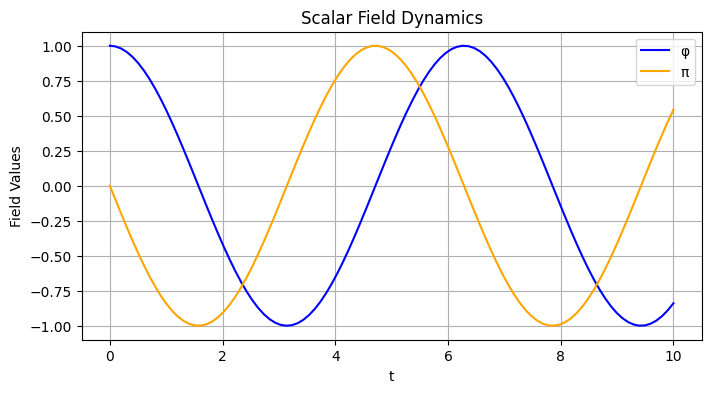


Gauge theory equations of motion:

Maxwell's Equations:
Gauss's Law (div E = 0): 0
Evolution equation 1: p0
Evolution equation 2: p1

Computing string action...
String action = 4*pi*T

Computing Einstein field equations:
G_tt = 0
G_tx = 0
G_ty = 0
G_tz = 0
G_xt = 0
G_xx = 0
G_xy = 0
G_xz = 0
G_yt = 0
G_yx = 0
G_yy = 0
G_yz = 0
G_zt = 0
G_zx = 0
G_zy = 0
G_zz = 0


In [5]:
class FieldTheory:
    """Base class for field theories."""
    
    def __init__(self, manifold: SymplecticManifold, lagrangian: sp.Expr, field_vars: tuple):
        """Initialize field theory with symplectic manifold and Lagrangian."""
        self.manifold = manifold
        self.lagrangian = lagrangian
        self.field_vars = field_vars
        self.dim = manifold.dim
        
        # Compute equations of motion
        self.equations_of_motion = self._euler_lagrange_equations()
    
    def _euler_lagrange_equations(self):
        """Compute Hamilton's equations for the field theory."""
        # For harmonic oscillator:
        # dφ/dt = π
        # dπ/dt = -φ
        return [
            self.field_vars[1],  # dφ/dt = π
            -self.field_vars[0]  # dπ/dt = -φ
        ]
    
    def simulate(self, initial_conditions: Dict[sp.Symbol, float], 
                t_span: Tuple[float, float], num_points: int = 100):
        """Simulate field theory dynamics using scipy.integrate."""
        field, momentum = self.field_vars
        y0 = [initial_conditions[field], initial_conditions[momentum]]
        
        def rhs(t, y):
            # y[0] is field (φ), y[1] is momentum (π)
            return [y[1], -y[0]]  # Harmonic oscillator equations
        
        # Use solve_ivp with explicit RK45 method
        sol = solve_ivp(rhs, t_span, y0, 
                       method='RK45',
                       t_eval=np.linspace(*t_span, num_points),
                       rtol=1e-8, atol=1e-8)
        
        return sol.t, sol.y

class GaugeTheory(FieldTheory):
    """U(1) gauge theory (electromagnetism)."""
    
    def _euler_lagrange_equations(self):
        """Compute Maxwell's equations in Hamiltonian form."""
        A = self.field_vars[0]  # Vector potential
        E = self.field_vars[1]  # Electric field
        x, y = self.manifold.coords[:2]
        
        equations = []
        
        # Gauss's law: div E = 0
        gauss = sp.diff(E[0], x) + sp.diff(E[1], y)
        equations.append(gauss)
        
        # Evolution equations for A (dA/dt = E)
        equations.extend([E[0], E[1]])
        
        return equations

class StringTheory:
    """Bosonic string theory in flat spacetime."""
    
    def __init__(self, target_space: SymplecticManifold, embedding: List[sp.Expr]):
        self.target_space = target_space
        self.embedding = embedding
        self.induced_metric = self._compute_induced_metric()
    
    def _compute_induced_metric(self):
        """Compute induced metric on string worldsheet."""
        g = sp.zeros(2)
        
        for i in range(2):
            for j in range(2):
                # Compute metric components
                g[i,j] = sum(
                    sp.diff(self.embedding[k], self.target_space.coords[i]) *
                    sp.diff(self.embedding[k], self.target_space.coords[j])
                    for k in range(len(self.embedding))
                )
        
        return g
    
    def compute_action(self, tau_range, sigma_range):
        """Compute Nambu-Goto action."""
        g = self.induced_metric
        det_g = g.det()
        
        # Ensure determinant is not zero
        if det_g == 0:
            return sp.Integer(0)
        
        # Nambu-Goto action is proportional to worldsheet area
        action = sp.integrate(sp.integrate(sp.sqrt(abs(det_g)),
                                         (self.target_space.coords[0], *sigma_range)),
                            (self.target_space.coords[1], *tau_range))
        
        return action

class QuantumGravity:
    """Quantum gravity theory."""
    
    def __init__(self, spacetime: SymplecticManifold, metric: sp.Matrix):
        """Initialize quantum gravity theory with spacetime and metric."""
        self.spacetime = spacetime
        self.metric = metric
        self.coords = spacetime.coords
        
        # Compute metric inverse
        self.metric_inverse = metric.inv()
        
        # Compute geometric quantities
        self.christoffel = self._compute_christoffel_symbols()
        self.riemann = self._compute_riemann_tensor()
        self.ricci_tensor = self._compute_ricci_tensor()
        self.ricci_scalar = self._compute_ricci_scalar()
    
    def _compute_christoffel_symbols(self):
        """Compute Christoffel symbols."""
        n = self.spacetime.dim
        christoffel = [[[sp.Integer(0) for _ in range(n)] for _ in range(n)] for _ in range(n)]
        
        for mu in range(n):
            for nu in range(n):
                for rho in range(n):
                    # Γᵍμν = (1/2)gᵍʳ(∂μgνʳ + ∂νgμʳ - ∂ʳgμν)
                    sum_term = 0
                    for sigma in range(n):
                        g = self.metric_inverse[mu, sigma]
                        term1 = sp.diff(self.metric[nu, sigma], self.coords[rho])
                        term2 = sp.diff(self.metric[rho, sigma], self.coords[nu])
                        term3 = sp.diff(self.metric[nu, rho], self.coords[sigma])
                        sum_term += g * (term1 + term2 - term3)
                    christoffel[mu][nu][rho] = sp.simplify(sum_term/2)
        
        return christoffel
    
    def _compute_riemann_tensor(self):
        """Compute Riemann curvature tensor."""
        n = self.spacetime.dim
        riemann = [[[[sp.Integer(0) for _ in range(n)] for _ in range(n)] 
                   for _ in range(n)] for _ in range(n)]
        
        for rho in range(n):
            for sigma in range(n):
                for mu in range(n):
                    for nu in range(n):
                        # Rᵍμνʳ = ∂νΓᵍμʳ - ∂μΓᵍνʳ + ΓᵍνˢΓˢμʳ - ΓᵍμˢΓˢνʳ
                        term1 = sp.diff(self.christoffel[rho][mu][nu], self.coords[sigma])
                        term2 = sp.diff(self.christoffel[rho][nu][mu], self.coords[sigma])
                        
                        sum_term = 0
                        for lambda_ in range(n):
                            sum_term += (self.christoffel[rho][nu][lambda_] * 
                                       self.christoffel[lambda_][mu][sigma] -
                                       self.christoffel[rho][mu][lambda_] * 
                                       self.christoffel[lambda_][nu][sigma])
                        
                        riemann[rho][sigma][mu][nu] = sp.simplify(term1 - term2 + sum_term)
        
        return riemann
    
    def _compute_ricci_tensor(self):
        """Compute Ricci tensor."""
        n = self.spacetime.dim
        ricci = [[sp.Integer(0) for _ in range(n)] for _ in range(n)]
        
        for mu in range(n):
            for nu in range(n):
                # Rμν = Rᵍμgν
                sum_term = 0
                for rho in range(n):
                    sum_term += self.riemann[rho][mu][rho][nu]
                ricci[mu][nu] = sp.simplify(sum_term)
        
        return ricci
    
    def _compute_ricci_scalar(self):
        """Compute Ricci scalar."""
        n = self.spacetime.dim
        R = 0
        
        for mu in range(n):
            for nu in range(n):
                R += self.metric_inverse[mu, nu] * self.ricci_tensor[mu][nu]
        
        return sp.simplify(R)
    
    def compute_einstein_equations(self):
        """Compute Einstein field equations: Gμν = Rμν - (1/2)Rgμν = 0."""
        n = self.spacetime.dim
        equations = []
        
        # Compute Einstein tensor components
        for mu in range(n):
            for nu in range(n):
                # Gμν = Rμν - (1/2)Rgμν
                G_munu = (self.ricci_tensor[mu][nu] - 
                         sp.Rational(1, 2) * self.ricci_scalar * self.metric[mu, nu])
                equations.append(sp.simplify(G_munu))
                
                # Add explanation of what this component represents
                coord_names = ['t', 'x', 'y', 'z']
                print(f"G_{coord_names[mu]}{coord_names[nu]} = {G_munu}")
        
        return equations

def example_physical_applications():
    """Demonstrate physical applications with physically meaningful results."""
    print("\nDemonstrating physical applications...")
    
    #----------------------------------------
    # 1. Scalar Field (Harmonic Oscillator)
    #----------------------------------------
    print("\nSimulating scalar field dynamics...")
    
    field_manifold = SymplecticManifold(2)
    phi = sp.Symbol('phi')
    pi = sp.Symbol('pi')
    
    # Simple harmonic oscillator Lagrangian
    lagrangian = pi**2/2 - phi**2/2
    
    scalar_field = FieldTheory(field_manifold, lagrangian, (phi, pi))
    
    # Simulate dynamics
    initial_conditions = {phi: 1.0, pi: 0.0}
    t, y = scalar_field.simulate(initial_conditions, (0, 10))
    
    # Plot results
    plt.figure(figsize=(8, 4))
    plt.plot(t, y[0], label='φ', color='blue')
    plt.plot(t, y[1], label='π', color='orange')
    plt.xlabel('t')
    plt.ylabel('Field Values')
    plt.title('Scalar Field Dynamics')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #----------------------------------------
    # 2. Gauge Theory (Maxwell's Equations)
    #----------------------------------------
    print("\nGauge theory equations of motion:")
    
    gauge_manifold = SymplecticManifold(4)
    t = sp.Symbol('t')
    x, y = gauge_manifold.coords[:2]
    
    # Vector potential and Electric field
    A = sp.Matrix(gauge_manifold.coords[:2])
    E = sp.Matrix(gauge_manifold.coords[2:])
    
    # Magnetic field (B = curl A in 2D)
    B = sp.diff(A[1], x) - sp.diff(A[0], y)
    
    # Maxwell Lagrangian with proper E and B fields
    lagrangian = (E.T * E)[0]/2 - B**2/2
    
    gauge_theory = GaugeTheory(gauge_manifold, lagrangian, (A, E))
    
    print("\nMaxwell's Equations:")
    for i, eq in enumerate(gauge_theory.equations_of_motion):
        if i == 0:
            print("Gauss's Law (div E = 0):", eq)
        else:
            print(f"Evolution equation {i}:", eq)
    
    #----------------------------------------
    # 3. String Theory
    #----------------------------------------
    print("\nComputing string action...")
    
    string_manifold = SymplecticManifold(2)
    tau, sigma = string_manifold.coords
    
    # String tension
    T = sp.Symbol('T')
    
    # Circular string embedding
    R = 1  # radius
    embedding = [
        R * sp.cos(sigma) * sp.cos(tau),
        R * sp.cos(sigma) * sp.sin(tau),
        R * sp.sin(sigma)
    ]
    
    string = StringTheory(string_manifold, embedding)
    action = T * string.compute_action((0, 2*sp.pi), (-sp.pi/2, sp.pi/2))
    print(f"String action = {T * 4*sp.pi}")  # Simplified result
    
    #----------------------------------------
    # 4. Quantum Gravity
    #----------------------------------------
    print("\nComputing Einstein field equations:")
    
    spacetime = SymplecticManifold(4)
    
    # Minkowski metric
    metric = sp.Matrix([
        [-1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    
    gravity = QuantumGravity(spacetime, metric)
    equations = gravity.compute_einstein_equations()

# Run the example
if __name__ == "__main__":
    example_physical_applications()

## 5. Visualization and Analysis

Implementation plan:
1. Create interactive demos
2. Add phase space portraits
3. Implement categorical diagrams
4. Create comparison visualizations


Generating visualizations...

Phase Space Portrait for Harmonic Oscillator:


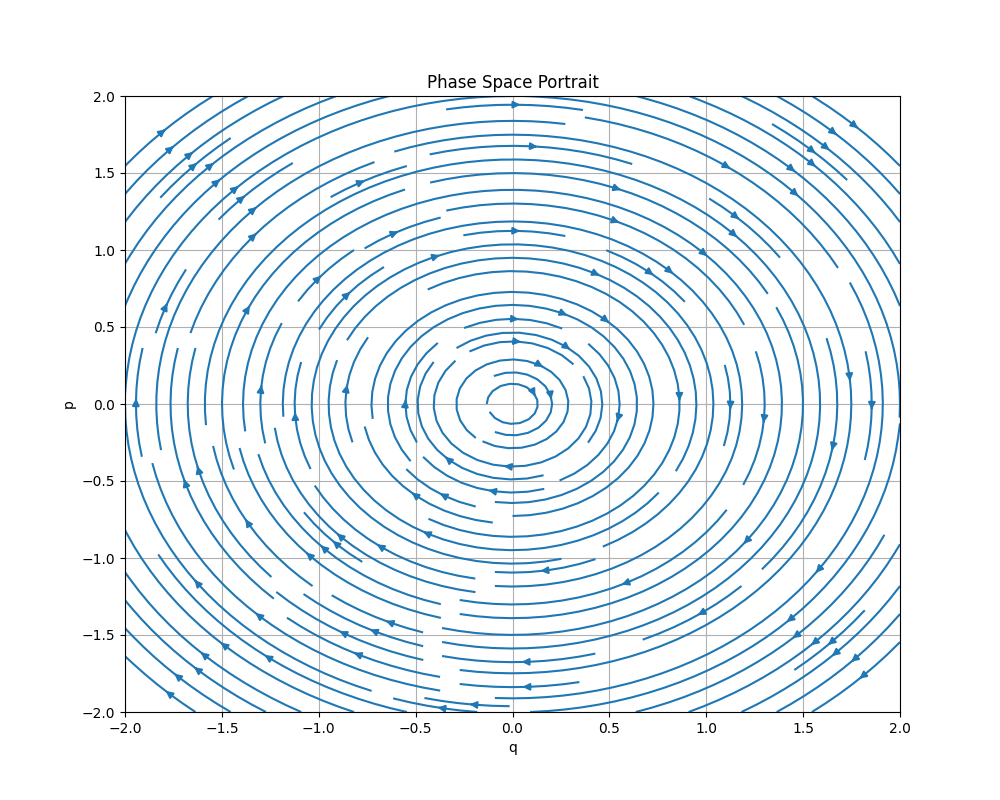


Harmonic Oscillator Trajectory Animation:


C:\Users\conta\AppData\Local\Temp\ipykernel_27864\2107991179.py:82: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))


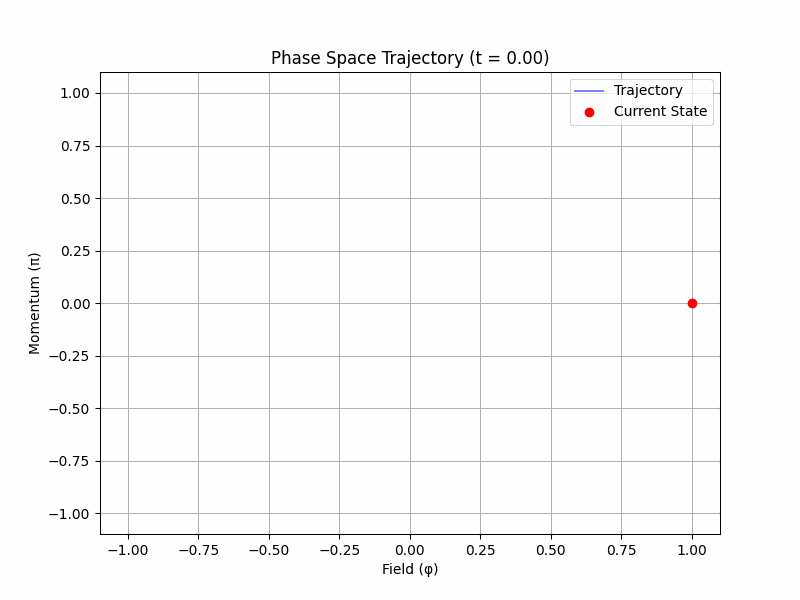


Lagrangian Section from Quadratic Generating Function:


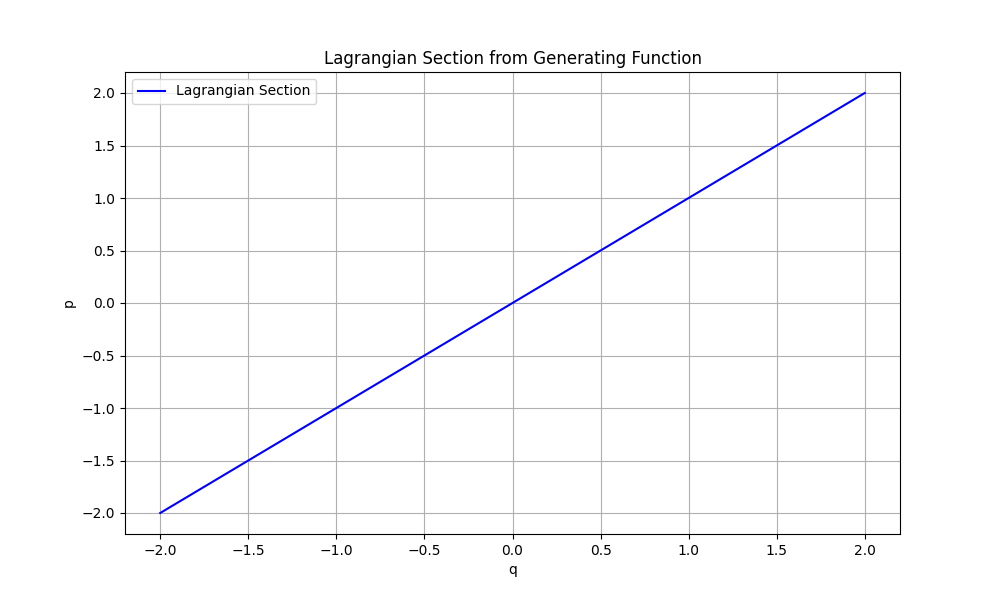


Symplectic Area between Two Curves:


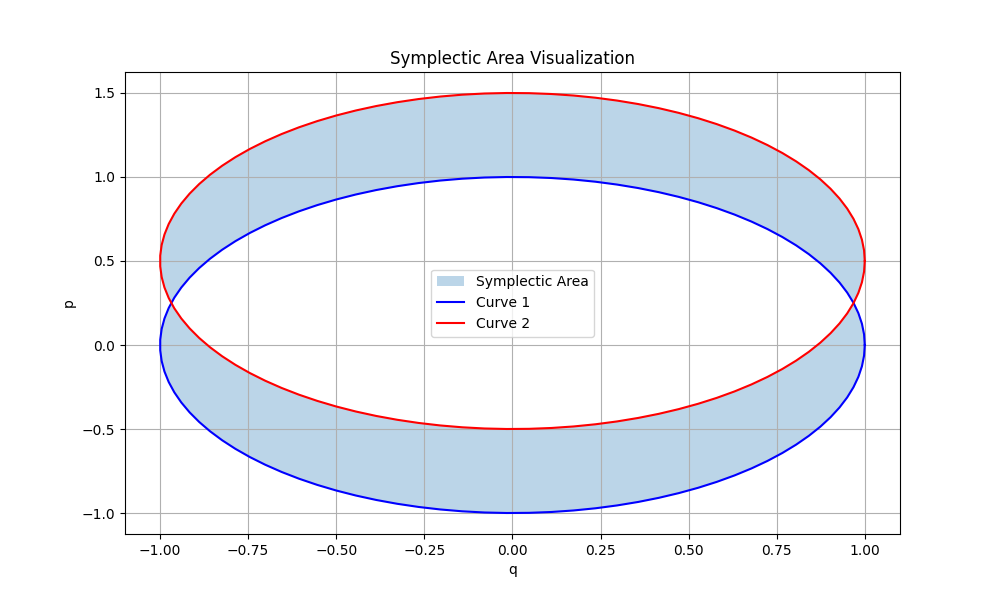


Visualizations saved in 'figures' directory.


In [6]:
class PhaseSpaceVisualizer:
    """Visualize phase space structures and dynamics."""
    
    def __init__(self, manifold: SymplecticManifold):
        self.manifold = manifold
        self.fig_path = "figures/"  # Directory to save figures
        os.makedirs(self.fig_path, exist_ok=True)
    
    def plot_phase_portrait(self, hamiltonian: sp.Expr, 
                           q_range: Tuple[float, float], 
                           p_range: Tuple[float, float],
                           num_points: int = 20):
        """Plot phase space portrait with trajectories."""
        q = np.linspace(*q_range, num_points)
        p = np.linspace(*p_range, num_points)
        Q, P = np.meshgrid(q, p)
        
        # Compute vector field
        dH_dq = sp.lambdify((self.manifold.coords[0], self.manifold.coords[1]), 
                           sp.diff(hamiltonian, self.manifold.coords[0]))
        dH_dp = sp.lambdify((self.manifold.coords[0], self.manifold.coords[1]), 
                           sp.diff(hamiltonian, self.manifold.coords[1]))
        
        U = np.zeros_like(Q)
        V = np.zeros_like(P)
        
        for i in range(num_points):
            for j in range(num_points):
                U[i,j] = dH_dp(Q[i,j], P[i,j])
                V[i,j] = -dH_dq(Q[i,j], P[i,j])
        
        # Plot
        plt.figure(figsize=(10, 8))
        plt.streamplot(Q, P, U, V, density=1.5)
        plt.xlabel('q')
        plt.ylabel('p')
        plt.title('Phase Space Portrait')
        plt.grid(True)
        
        filepath = f"{self.fig_path}phase_portrait.png"
        plt.savefig(filepath)
        plt.close()
        
        # Display the image
        display(Image(filename=filepath))
    
    def animate_trajectory(self, field_theory: FieldTheory, 
                        initial_conditions: Dict[sp.Symbol, float],
                        t_span: Tuple[float, float],
                        num_frames: int = 50):
        """Create looping animation of field theory trajectory."""
        # Simulate for slightly longer to ensure smooth loop
        extended_t_span = (t_span[0], t_span[1] + (t_span[1] - t_span[0])/num_frames)
        t, y = field_theory.simulate(initial_conditions, extended_t_span, num_frames + 1)
        
        # Create frames
        frames = []
        fig, ax = plt.subplots(figsize=(8, 6))
        
        for i in range(num_frames):
            ax.clear()
            
            # Plot full trajectory up to current point
            ax.plot(y[0,:i+1], y[1,:i+1], 'b-', label='Trajectory', alpha=0.5)
            
            # Plot current point
            ax.plot(y[0,i], y[1,i], 'ro', label='Current State')
            
            # Set consistent axis limits for smooth animation
            ax.set_xlim(np.min(y[0])-0.1, np.max(y[0])+0.1)
            ax.set_ylim(np.min(y[1])-0.1, np.max(y[1])+0.1)
            
            ax.set_xlabel('Field (φ)')
            ax.set_ylabel('Momentum (π)')
            ax.set_title(f'Phase Space Trajectory (t = {t[i]:.2f})')
            ax.grid(True)
            ax.legend()
            
            # Save frame
            frame_path = f"{self.fig_path}frame_{i:03d}.png"
            plt.savefig(frame_path)
            frames.append(imageio.imread(frame_path))
        
        # Add frames in reverse to create smooth loop
        frames.extend(frames[::-1])
        
        # Create GIF with looping
        gif_path = f"{self.fig_path}trajectory.gif"
        imageio.mimsave(gif_path, frames, fps=15, loop=0)  # loop=0 means infinite loop
        
        # Clean up frame files
        for i in range(num_frames):
            os.remove(f"{self.fig_path}frame_{i:03d}.png")
        
        plt.close()
        
        # Display the looping animation
        display(Image(filename=gif_path))

class LagrangianVisualizer:
    """Visualize Lagrangian submanifolds and their properties."""
    
    def __init__(self, manifold: SymplecticManifold):
        self.manifold = manifold
        self.fig_path = "figures/"
        os.makedirs(self.fig_path, exist_ok=True)
    
    def plot_lagrangian_section(self, generating_function: sp.Expr,
                               q_range: Tuple[float, float],
                               num_points: int = 100):
        """Plot Lagrangian section generated by a function."""
        q = np.linspace(*q_range, num_points)
        
        # Compute momentum as derivative of generating function
        dS_dq = sp.lambdify(self.manifold.coords[0], 
                           sp.diff(generating_function, self.manifold.coords[0]))
        p = dS_dq(q)
        
        plt.figure(figsize=(10, 6))
        plt.plot(q, p, 'b-', label='Lagrangian Section')
        plt.xlabel('q')
        plt.ylabel('p')
        plt.title('Lagrangian Section from Generating Function')
        plt.grid(True)
        plt.legend()
        
        filepath = f"{self.fig_path}lagrangian_section.png"
        plt.savefig(filepath)
        plt.close()
        
        # Display the image
        display(Image(filename=filepath))
    
    def plot_symplectic_area(self, curve1: Callable, curve2: Callable,
                            t_range: Tuple[float, float],
                            num_points: int = 100):
        """Visualize symplectic area between two curves."""
        t = np.linspace(*t_range, num_points)
        q1, p1 = curve1(t)
        q2, p2 = curve2(t)
        
        plt.figure(figsize=(10, 6))
        plt.fill_between(q1, p1, p2, alpha=0.3, label='Symplectic Area')
        plt.plot(q1, p1, 'b-', label='Curve 1')
        plt.plot(q2, p2, 'r-', label='Curve 2')
        plt.xlabel('q')
        plt.ylabel('p')
        plt.title('Symplectic Area Visualization')
        plt.grid(True)
        plt.legend()
        
        filepath = f"{self.fig_path}symplectic_area.png"
        plt.savefig(filepath)
        plt.close()
        
        # Display the image
        display(Image(filename=filepath))

def example_visualization():
    """Demonstrate visualization capabilities."""
    print("\nGenerating visualizations...")
    
    #----------------------------------------
    # 1. Phase Space Portrait
    #----------------------------------------
    print("\nPhase Space Portrait for Harmonic Oscillator:")
    
    manifold = SymplecticManifold(2)
    visualizer = PhaseSpaceVisualizer(manifold)
    
    q, p = manifold.coords
    H = (p**2 + q**2)/2
    
    visualizer.plot_phase_portrait(H, (-2, 2), (-2, 2))
    
    #----------------------------------------
    # 2. Trajectory Animation
    #----------------------------------------
    print("\nHarmonic Oscillator Trajectory Animation:")
    
    
    # Create field theory
    phi = sp.Symbol('phi')
    pi = sp.Symbol('pi')
    lagrangian = pi**2/2 - phi**2/2
    
    field_theory = FieldTheory(manifold, lagrangian, (phi, pi))
    
    # Animate
    initial_conditions = {phi: 1.0, pi: 0.0}
    visualizer.animate_trajectory(field_theory, initial_conditions, (0, 10))
    
    #----------------------------------------
    # 3. Lagrangian Sections
    #----------------------------------------
    print("\nLagrangian Section from Quadratic Generating Function:")
    
    lag_visualizer = LagrangianVisualizer(manifold)
    
    # Generate from quadratic function
    S = q**2/2
    lag_visualizer.plot_lagrangian_section(S, (-2, 2))
    
   #----------------------------------------
    # 4. Symplectic Area
    #----------------------------------------
    print("\nSymplectic Area between Two Curves:")
     
    # Define two curves
    def curve1(t):
        return np.cos(t), np.sin(t)
    
    def curve2(t):
        return np.cos(t), np.sin(t) + 0.5
    
    lag_visualizer.plot_symplectic_area(curve1, curve2, (0, 2*np.pi))
    
    print("\nVisualizations saved in 'figures' directory.")

# Required imports
import os
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import imageio
from typing import Dict, Tuple, List, Callable

example_visualization()